## Sentiment Analysis Template

### Download nltk library
We need to download the nltk library first. Run the cell directly below this one that contains nltk.donwload(). A new window should open, showing the NLTK Downloader. Click on the File menu and select Change Download Directory. For central installation, set this to C:\nltk_data (Windows), /usr/local/share/nltk_data (Mac), or /usr/share/nltk_data (Unix). Next, select the packages or collections you want to download.

Note: This may take a couple of minutes depending on your machine and load

Download instructions taken from: https://www.nltk.org/data.html

In [ ]:
# SKIP THIS IF YOU HAVE ALREADY DOWNLOADED NLTK
import nltk
nltk.download()

In [18]:
# TO TEST IF DOWNLOAD WORKS
import nltk
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [19]:
#
# STD Imports
#
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# NLP Lib
import nltk
from nltk.corpus import stopwords

# Sklearn 
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#
# Load reviews from yelp
# 
# Note: in this specific case it doesn't really matter which
# reviews we pull since we can still learn what constitutes a 
# positive or negative review in general - i.e. English is English
#
# Source: https://www.kaggle.com/luisfredgs/yelp-reviews-csv
#

reviewsDF = pd.read_csv('../yelp_dataset/yelp_review.csv')

In [21]:
# This is a very large dataset so we may need to shorten it
len(reviewsDF)

5261668

In [22]:
# Shorten dataset - OPTIONAL - depends on how long you are willing to wait :)
# reviewsDF = reviewsDF.sample(frac=0.4, replace=True, random_state=1)
# len(reviewsDF)

In [23]:
# 
# Exploring contents
#

# statistical info about numerical data cols
print(reviewsDF.describe())

# sneak peek
reviewsDF.head(2)


              stars        useful         funny          cool
count  5.261668e+06  5.261668e+06  5.261668e+06  5.261668e+06
mean   3.727739e+00  1.385085e+00  5.091961e-01  5.860917e-01
std    1.433593e+00  4.528727e+00  2.686168e+00  2.233706e+00
min    1.000000e+00 -1.000000e+00  0.000000e+00 -1.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  2.000000e+00  0.000000e+00  1.000000e+00
max    5.000000e+00  3.364000e+03  1.481000e+03  1.105000e+03


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0


In [24]:
#
# Adding any additonal features
#
reviewsDF['char_len'] = reviewsDF['text'].apply(lambda x: len(x))

# We can define a threshold for what constitutes "positive reviews"
thresh = 4 
reviewsDF['positive'] = reviewsDF['stars'].apply(
    lambda x: 1 if x >= thresh else 0)

In [25]:
# We see that anything 4 stars and above are marked as 1 -> positive 
# and 0 -> negative
reviewsDF.head(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,char_len,positive
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213,1
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502,1


### Feature Visualization
Here we will attempt to visualize any correlations that
we see in the data with respect to the stars or positive/negative review. We can immediately notice that the stars 1-3 is the minority class and 
4-5 is the majority class. We are working with an imbalanced dataset

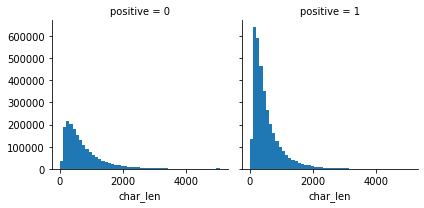

In [26]:
# Length of review wrt. pos/neg
vis2 = sns.FacetGrid(data=reviewsDF, col='positive')
vis2.map(plt.hist, 'char_len', bins=50)

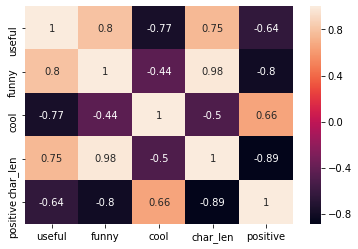

In [27]:
# Let's look at the other features
rating = reviewsDF.groupby('stars').mean()
sns.heatmap(data=rating.corr(), annot=True)

### Visible correlations
It looks like useful and character lengh are correlated as well as (useful, funny), (funny, character length), (cool, positive).

### Make and process data

In [28]:
# Even out the majority and minority classes
from sklearn.utils import resample
df_majority = reviewsDF[reviewsDF.stars==5]
df_minority = reviewsDF[reviewsDF.stars==1]
print('Majority class size: ',len(df_majority))
print('Minority class size: ',len(df_minority))

Majority class size:  2253347
Minority class size:  731363


In [29]:
df_downsampled = resample(df_majority,
                          replace=False,
                          n_samples=len(df_minority),
                          random_state=123)

reviewDF = pd.concat([df_downsampled[0:len(df_minority)//16], 
                      df_minority[0:len(df_minority)//16]])
len(reviewDF)

91420

In [30]:
classes = reviewsDF[(reviewsDF['stars'] == 1) | (reviewsDF['stars'] == 5)]
X,y = classes['text'], classes['stars']

In [ ]:
# # # UNSAFE DO NOT RUN # # # 
# We want to use data that  #
# has already been saved    #
# locally to prevent having #
# to run the program all    #
# night.                    #
# # # # # # # # # # # # # # #


# Save X and y
X.to_csv('X_raw.csv', header=False)
y.to_csv('y.csv', header=False)

In [31]:
# Load X and Y 
X = pd.read_csv('X_raw.csv', header=None, index_col=0, squeeze=True)
y = pd.read_csv('y.csv', header=None, index_col=0, squeeze=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [32]:
# 
# Clean up text and use bag of words format
#
import string

def clean_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    cleaned_text = [word for word in nopunc.split() 
                    if word.lower() not in stopwords.words('english')]
    return cleaned_text

In [170]:
# # # UNSAFE DO NOT RUN # # # 
# We want to use data that  #
# has already been saved    #
# locally to prevent having #
# to run the program all    #
# night.                    #
# # # # # # # # # # # # # # #

#
# WARNING: DO NOT RUN IF YOU CAN LOAD BOW_TRANSFORMER FROM FILE
# This will take a very long time - better to load locally if not retraining
#
# Vectorize the lemmas returned by the text cleaning
#
# CountVectorizer source: 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#

bow_transformer = CountVectorizer(analyzer=clean_text).fit(X)


In [171]:
# # # UNSAFE DO NOT RUN # # # 
# We want to use data that  #
# has already been saved    #
# locally to prevent having #
# to run the program all    #
# night.                    #
# # # # # # # # # # # # # # #

#
# WARNING: DO NOT RUN IF YOU CAN LOAD BOW_TRANSFORMER FROM FILE
# This will take a very long time - better to load locally if not retraining
#
# Save the fit beause it takes forever
#

import pickle

filename = 'bow_transformer.sav'
pickle.dump(bow_transformer, open(filename, 'wb'))

In [33]:
# load the model from disk
import pickle

bow_transformer = pickle.load(open('bow_transformer.sav', 'rb'))

In [34]:
# About our vocabulary
print('Length of vocabulary: ',len(bow_transformer.vocabulary_))

Length of vocabulary:  619992


### BOW attributes
To get the vector of a specific review:
bow_transformer.transform($review$)

To get the exact word:
bow_transformer.get_feature_names()[$index of word$]

In [35]:
# EX:
print(bow_transformer.transform([X[0]]))

  (0, 13688)	1
  (0, 211811)	1
  (0, 215417)	1
  (0, 256802)	1
  (0, 263727)	1
  (0, 284193)	1
  (0, 373746)	1
  (0, 395745)	1
  (0, 457041)	1
  (0, 463960)	1
  (0, 490562)	1
  (0, 525008)	1
  (0, 526484)	1
  (0, 534713)	1
  (0, 541455)	1
  (0, 541621)	1
  (0, 554325)	1
  (0, 555960)	1
  (0, 572790)	1


In [ ]:
# # # UNSAFE DO NOT RUN # # # 
# We want to use data that  #
# has already been saved    #
# locally to prevent having #
# to run the program all    #
# night.                    #
# # # # # # # # # # # # # # #

#
# WARNING: DO NOT RUN IF YOU CAN LOAD X_DATA FROM FILE
# This will take a very long time - better to load locally if not retraining
#
# Create sparse matrix - This will take a very long time - better to load locally if not retraining
#
X_data = bow_transformer.transform(X)

In [185]:
# # # UNSAFE DO NOT RUN # # # 
# We want to use data that  #
# has already been saved    #
# locally to prevent having #
# to run the program all    #
# night.                    #
# # # # # # # # # # # # # # #

#
# WARNING: DO NOT RUN IF YOU CAN LOAD X_DATA FROM FILE
# This will take a very long time - better to load locally if not retraining
#
# Saving X_data since it is very large

from scipy import sparse
sparse.save_npz('X_data.npz', X_data)

In [36]:
# Load X_data

from scipy import sparse
X_data = sparse.load_npz('X_data.npz')

In [37]:
# Stats
print('Shape of Sparse Matrix: ', X_data.shape)
print('Amount of Non-Zero occurrences: ', X_data.nnz)
# Percentage of non-zero values
density = (100.0 * X_data.nnz / (X_data.shape[0] * X_data.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (1193742, 619992)
Amount of Non-Zero occurrences:  54683338
Density: 0.007388537081168966


### Training the model

In [38]:
# Imports for model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [39]:
#
# Split data and define model
#
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    y, 
                                                    test_size=test_size,
                                                    random_state=101)

# Using Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [200]:
#
# WARNING: ONLY RUN THIS IF YOU WANT TO SAVE 
# A NEW MODEL YOU HAVE CREATED.
#

filename = 'YourNewModel.sav'
pickle.dump(nb, open(filename, 'wb'))

In [40]:
# OPTIONAL - Load already saved model
nb = pickle.load(open('NBModel.sav', 'rb'))

In [41]:
preds = nb.predict(X_test)

### Model Evaluation

In [42]:
#
# Get confusion matrix and reports
#
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[ 79257   8294]
 [ 13042 257530]]


              precision    recall  f1-score   support

           1       0.86      0.91      0.88     87551
           5       0.97      0.95      0.96    270572

    accuracy                           0.94    358123
   macro avg       0.91      0.93      0.92    358123
weighted avg       0.94      0.94      0.94    358123



In [43]:
#
# Singular review prediction
#

def predict_review(review):
    review_transformed = bow_transformer.transform([review])
    pred = nb.predict(review_transformed)[0]
    
    return 'positive' if pred==5 else 'negative'

In [44]:
sample_bad_review = "This restaurant is the worst place I have ever been to. \
                 The food was terrible, and my son threw up after. \
                 Also my dog is a poop."
predict_review(sample_bad_review)

'negative'

In [45]:
sample_good_review = "This place was fantastic. I take my mom here all \
                      the time and she loves it! Will definitely \
                      recommend this to others."
predict_review(sample_good_review)

'positive'